# Chapter 4 - What is This Stuff Called Probability?

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use("fivethirtyeight")
sns.set_context("poster")

from scipy import stats

E:\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
df = pd.DataFrame([[0.11, 0.20, 0.04, 0.01], 
                  [0.03, 0.14, 0.03, 0.16],
                  [0.03, 0.09, 0.02, 0.02],
                  [0.01, 0.05, 0.02, 0.03]],
                  columns=["Black", "Brunette", "Red", "Blond"],
                  index=["Brown", "Blue", "Hazel", "Green"])
df

,Black,Brunette,Red,Blond
Brown,0.11,0.20,0.04,0.01
Blue,0.03,0.14,0.03,0.16
Hazel,0.03,0.09,0.02,0.02
Green,0.01,0.05,0.02,0.03


In [3]:
print "Eye Marginals"
print df.sum(axis=1)
print df.sum(axis=1).sum()
print "Hair Marginals"
print df.sum(axis=0)
print df.sum(axis=0).sum()

Eye Marginals
Brown    0.36
Blue     0.36
Hazel    0.16
Green    0.11
dtype: float64
0.99
Hair Marginals
Black       0.18
Brunette    0.48
Red         0.11
Blond       0.22
dtype: float64
0.99


In [4]:
print "Conditional Probability of Eye Color"
print df.divide(df.sum(axis=0), axis=1).sum(axis=0)
df.divide(df.sum(axis=0), axis=1)

Conditional Probability of Eye Color
Black       1
Brunette    1
Red         1
Blond       1
dtype: float64


,Black,Brunette,Red,Blond
Brown,0.611111,0.416667,0.363636,0.045455
Blue,0.166667,0.291667,0.272727,0.727273
Hazel,0.166667,0.187500,0.181818,0.090909
Green,0.055556,0.104167,0.181818,0.136364


In [5]:
print "Conditional Probability of Hair Color"
print df.divide(df.sum(axis=1), axis=0).sum(axis=1)
df.divide(df.sum(axis=1), axis=0)

Conditional Probability of Hair Color
Brown    1
Blue     1
Hazel    1
Green    1
dtype: float64


,Black,Brunette,Red,Blond
Brown,0.305556,0.555556,0.111111,0.027778
Blue,0.083333,0.388889,0.083333,0.444444
Hazel,0.187500,0.562500,0.125000,0.125000
Green,0.090909,0.454545,0.181818,0.272727


## Running proportions

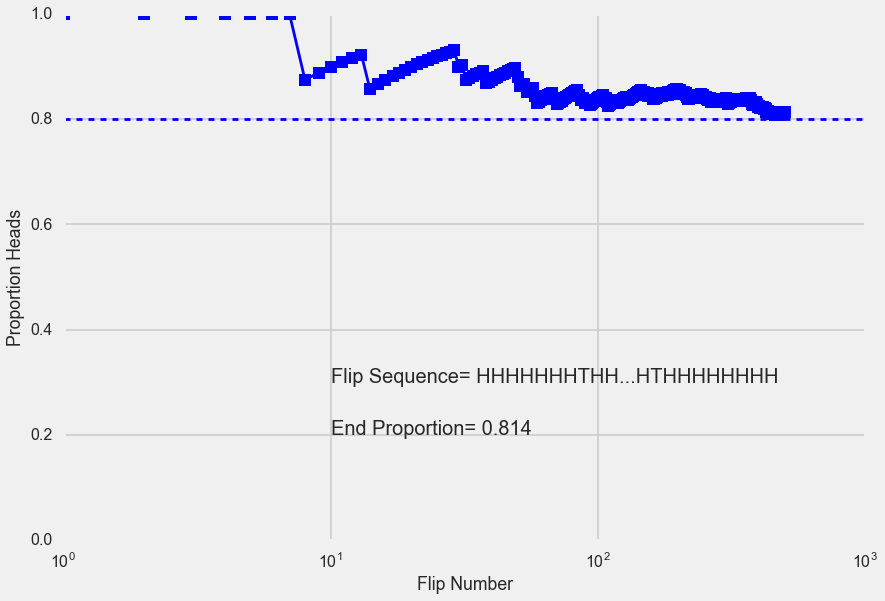

In [6]:
samples = stats.bernoulli.rvs(0.8, size=500, random_state=1337)
running_prop = samples.cumsum() * 1.0 / np.arange(1, samples.shape[0]+1)
plt.plot(np.arange(1, samples.shape[0]+1), running_prop, "-bs")
plt.ylim([0,1])
plt.axhline(0.8, ls="--")
plt.xscale("log")
plt.text(10, 0.2, "End Proportion= %.3f" % running_prop[-1], fontsize=20)
plt.text(10, 0.3,
         "Flip Sequence= %s" % ("".join("H" if k == 1 else "T" for k in samples[:10])
                                +"..."+
                                "".join("H" if k == 1 else "T" for k in samples[-10:])
         ), fontsize=20)
plt.xlabel("Flip Number")
plt.ylabel("Proportion Heads")

## Biased Spinner

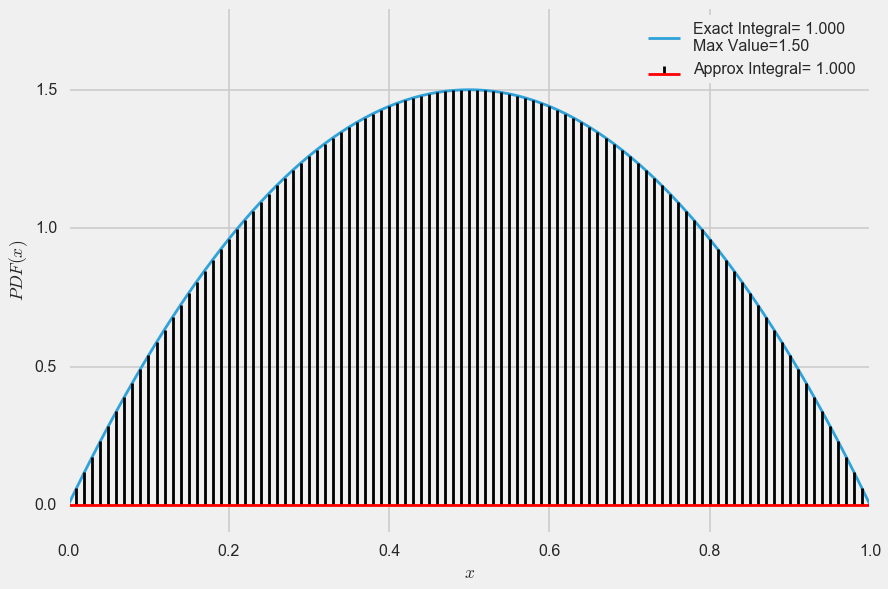

In [7]:
xslice = 0.01
x = np.arange(0,1 + xslice,xslice)
pdf = 6*x*(1-x)

## Approx integral
approx_integral = sum(pdf*xslice)

exact_integral_f = lambda k: (3*k**2) - (2*k**3)
exact_integral = exact_integral_f(1) - exact_integral_f(0)

plt.plot(x,pdf, label=("Exact Integral= %.3f" % exact_integral
                       +"\nMax Value=%.2f" % pdf.max()
                      ))
plt.stem(x,pdf, markerfmt=" ", linefmt="k-", linewidth=0.5, basefmt='r-',
         label="Approx Integral= %.3f" % approx_integral)
plt.xlabel("$x$")
plt.ylabel("$PDF(x)$")
plt.ylim([-0.1,1.8])
plt.legend(loc="upper right", fancybox=True, frameon=True)


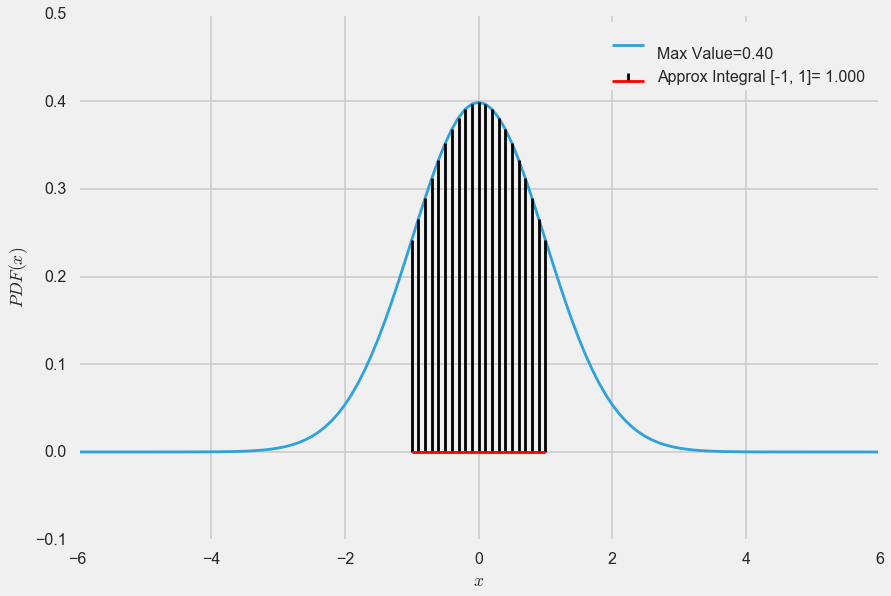

In [8]:
xslice = 0.1
mu = 0
stddev = 1
x = np.arange(mu-6*stddev,mu + 6*stddev + xslice,xslice)
pdf = stats.norm.pdf(x, mu, stddev)

x_req = np.arange(mu - stddev,mu + stddev + xslice,xslice)
pdf_req = stats.norm.pdf(x_req, mu, stddev)
## Approx integral
approx_integral = sum(pdf*xslice)

plt.plot(x,pdf, label="\nMax Value=%.2f" % pdf.max())
plt.stem(x_req,pdf_req, markerfmt=" ", linefmt="k-", linewidth=0.5, basefmt='r-',
         label="Approx Integral [%s, %s]= %.3f" % (mu - stddev, mu + stddev, approx_integral))
plt.xlabel("$x$")
plt.ylabel("$PDF(x)$")
plt.ylim([-0.1, 0.5])
plt.legend(loc="upper right", fancybox=True, frameon=True)
